# Stroke Prediction

This notebook is to predict whether someone will have stroke according to various features. We have used four models:

1 KNN

2 Random Forest

3 MLP

4 LogisticRegression 

In [ ]:
#import packages for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import package for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#read in data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


#drop missing value 
df = df.dropna()


#check data type for each column
df.dtypes

#change df's hypertension column into object
df['hypertension'] = df['hypertension'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')

#df

# Data Cleaning and Visualization

In [2]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


At this point, we have read in the stroke dataset and dropped any missing values.

We have also checked the data types for each column and converted the hypertension and heart_disease columns to object data types, which may be useful for certain types of analysis or machine learning tasks.

In [3]:
#take the catalagorical variables name and put them in a list
df,columns = df.iloc[:,1:], df.columns[1:]

cat_var = []
for i in range(len(df.columns)):
    if df.dtypes[i] == 'object':
        cat_var.append(df.columns[i])

This code creates a list called `cat_var` that contains the names of all the categorical variables in the dataset.
It does this by looping through the columns of the DataFrame and checking the data type of each column.
If the column is an object (i.e., a string or other non-numeric data type), it is added to the `cat_var` list.



This code creates a figure that contains multiple subplots, with each subplot showing the relationship between stroke and a different categorical variable. 
It does this by looping through the categorical variables in `cat_var` and plotting each one on a separate subplot using `sns.countplot`.
The `ax` parameter is used to specify the subplot to plot on for each variable.
The `set_title` method is used to add a title to each subplot, and the `set_xticklabels` method is used to rotate the x-axis tick labels to make them more readable.


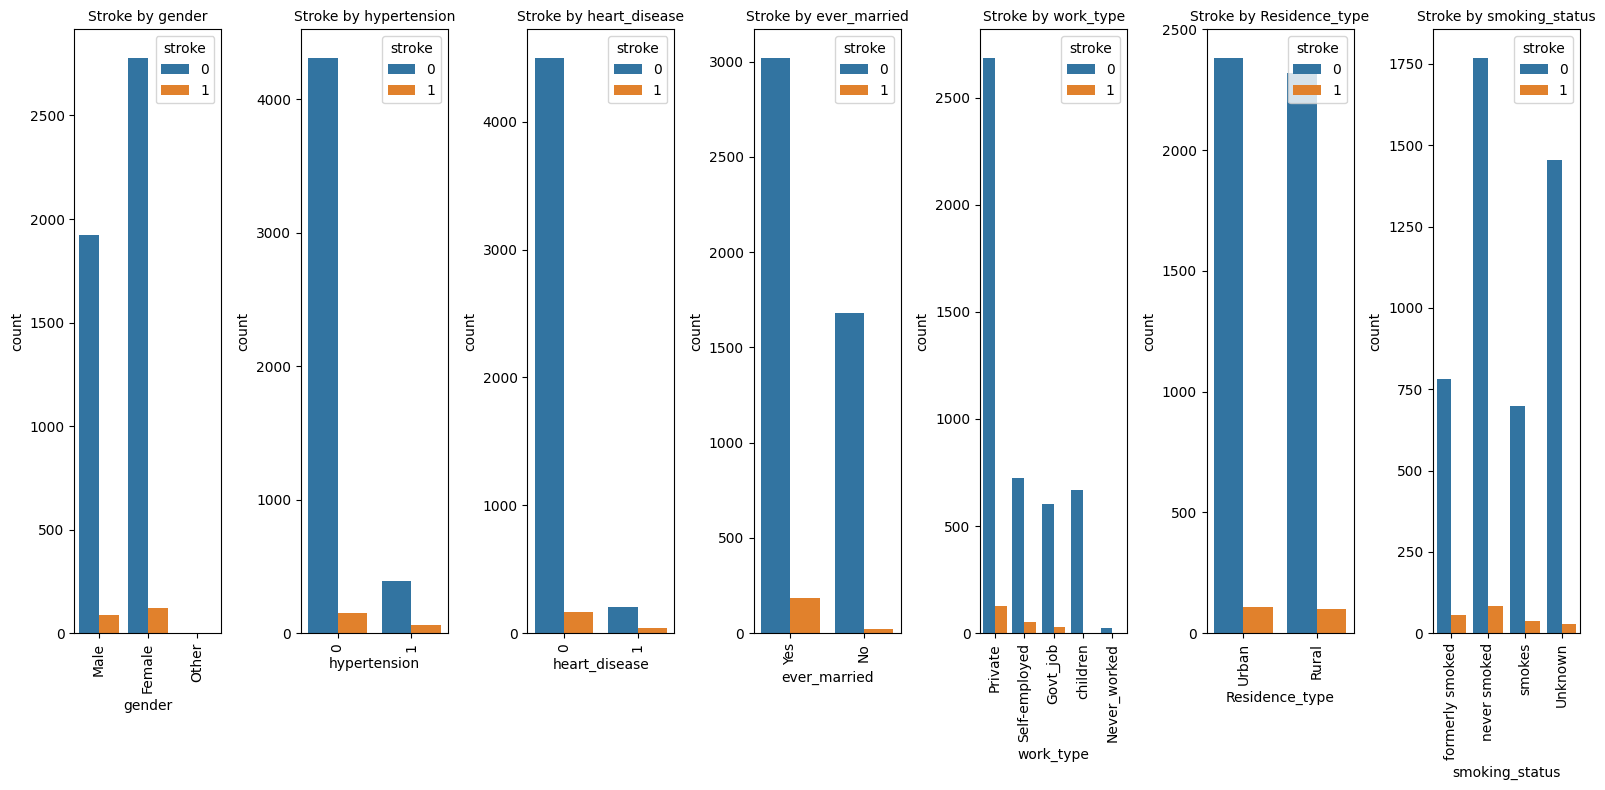

In [4]:

# create a subplot grid with four columns and one row
fig, axes = plt.subplots(nrows=1, ncols=len(cat_var), figsize=(16, 8))

# loop through each categorical variable, plotting it on a different subplot
for i, var in enumerate(cat_var):
    if i >= len(axes.flat):
        break
    sns.countplot(x=var, hue="stroke", data=df, ax=axes.flat[i])
    axes.flat[i].set_title('Stroke by ' + var, fontsize=10)
    axes.flat[i].set_xticklabels(axes.flat[i].get_xticklabels(), rotation=90)

# adjust the spacing between subplots and display the plot
plt.tight_layout()
plt.show()

This code creates a pair plot using the seaborn library to visualize the relationship between each pair of numerical variables in dataset, 
as well as the distribution of each variable.

<Figure size 800x800 with 0 Axes>

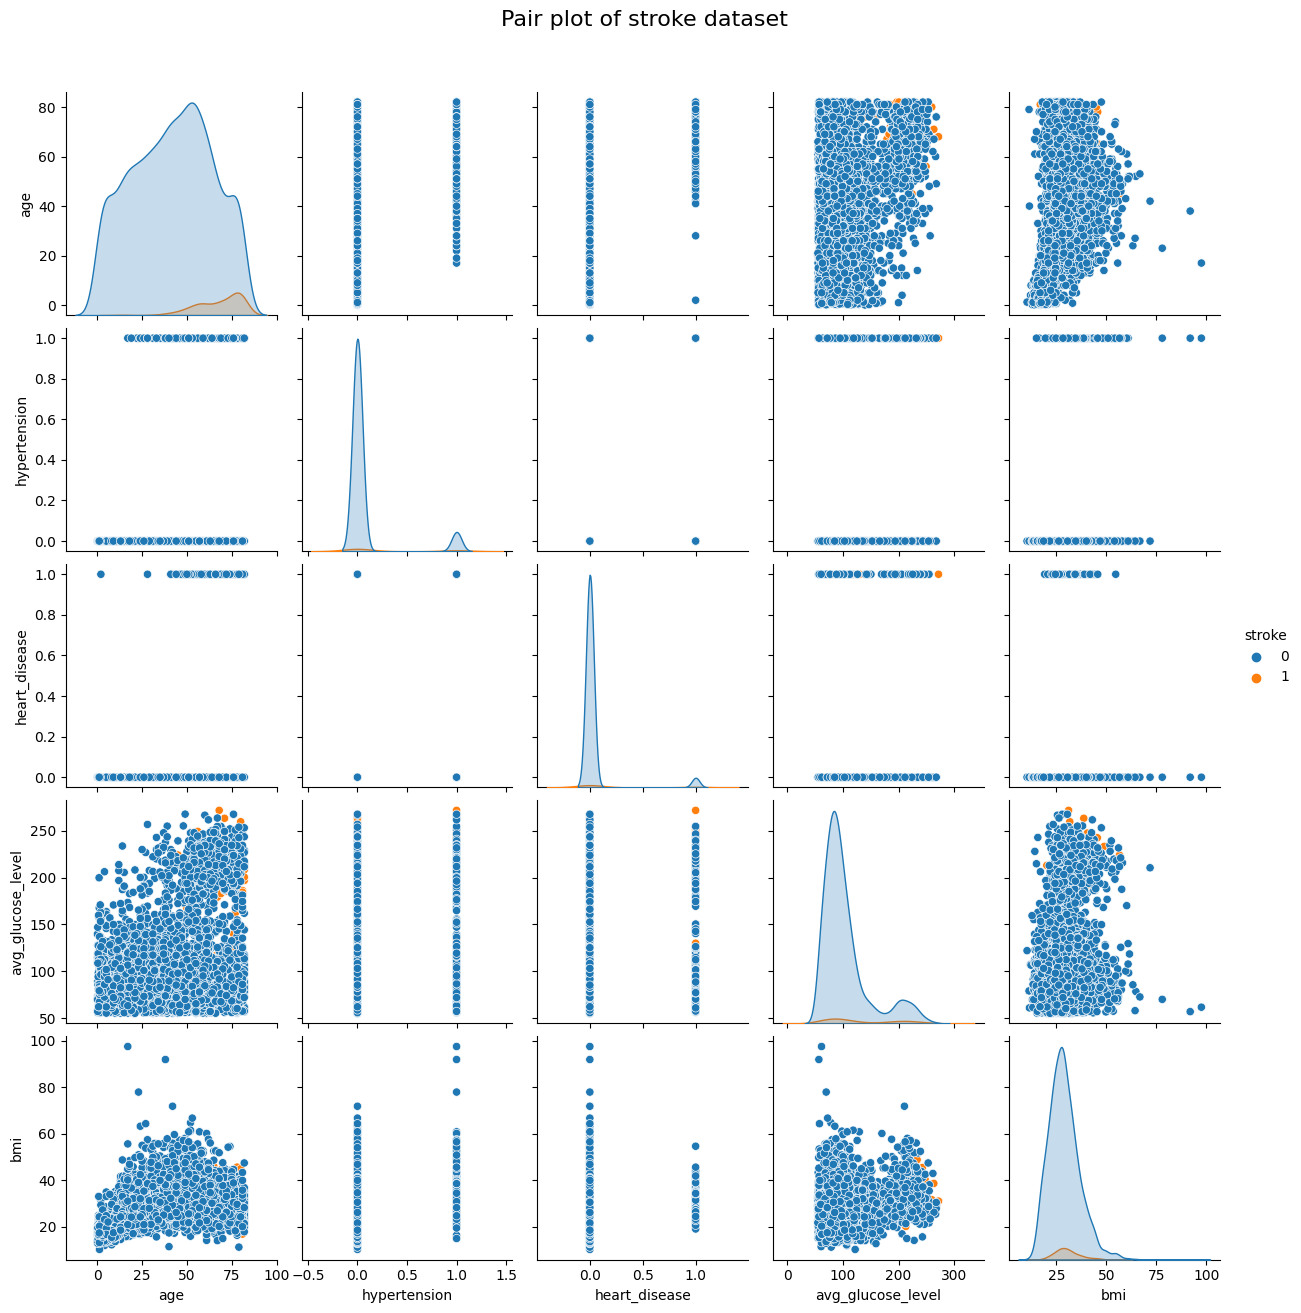

In [5]:

#creat pair plot to see the relationship between each variable
plt.figure(figsize=(8,8))
sns.pairplot(df.iloc[:,1:], hue='stroke', diag_kind='kde')
plt.suptitle('Pair plot of stroke dataset', fontsize=16, y=1.05)
plt.show()


In [6]:
#get unique value for each column which is categorical and convert to numerical
#for col in df.columns:
#    if df[col].dtype == 'object':
#        print(col)
#        print(df[col].unique())

#draw a heatmap to see the correlation between each variable

#map each unique value to a number
df['gender'] = df['gender'].map({'Male': 1, 'Female': 2, 'Other': 3})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 2})
df['work_type'] = df['work_type'].map({'Private': 1, 'Self-employed': 2, 'Govt_job': 3, 'children': 4, 'Never_worked': 5})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 2})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked': 1, 'never smoked': 2, 'smokes': 3, 'Unknown': 4})

df.dtypes

#change df's hypertension and heart_disease column back to int64
df['hypertension'] = df['hypertension'].astype('int64')
df['heart_disease'] = df['heart_disease'].astype('int64')



In [7]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
2,1,80.0,0,1,1,1,2,105.92,32.5,2,1
3,2,49.0,0,0,1,1,1,171.23,34.4,3,1
4,2,79.0,1,0,1,2,2,174.12,24.0,2,1
5,1,81.0,0,0,1,1,1,186.21,29.0,1,1
6,1,74.0,1,1,1,1,2,70.09,27.4,2,1
7,2,69.0,0,0,2,1,1,94.39,22.8,2,1
9,2,78.0,0,0,1,1,1,58.57,24.2,4,1
10,2,81.0,1,0,1,1,2,80.43,29.7,2,1
11,2,61.0,0,1,1,3,2,120.46,36.8,3,1


Text(0.5, 1.0, 'Correlation between each variable')

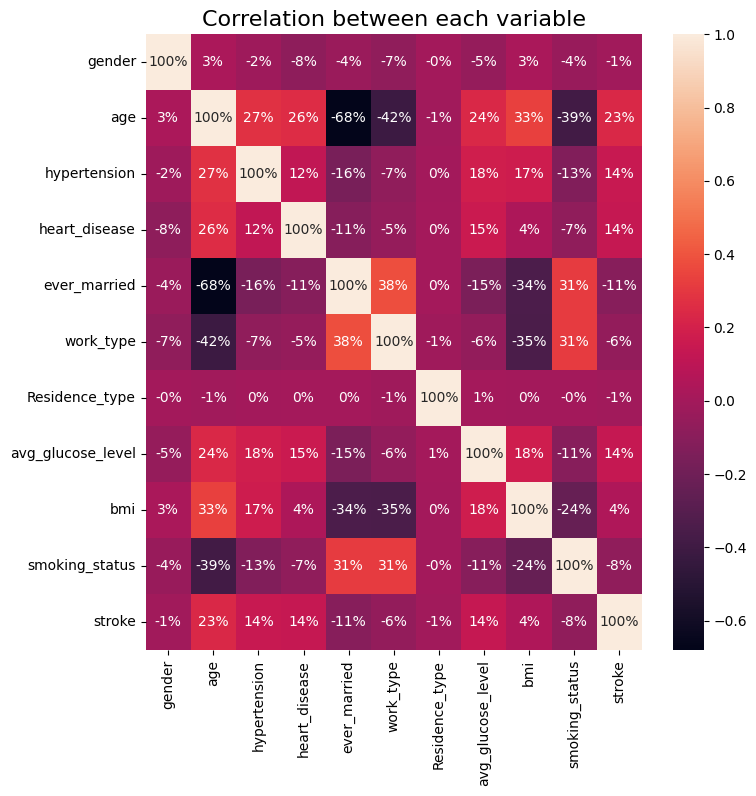

In [8]:
#creat a heatmap to see the correlation between each variable
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.title('Correlation between each variable', fontsize=16)

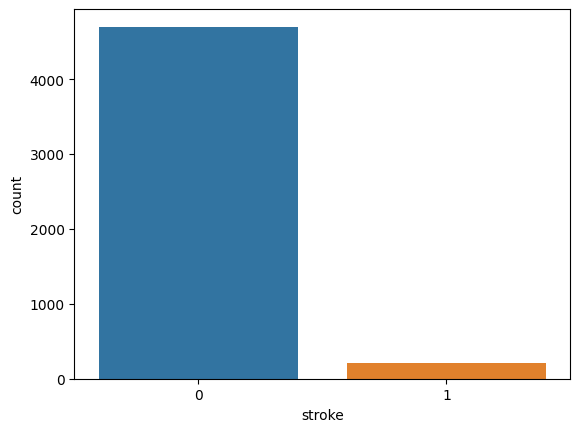

In [9]:
sns.countplot(x='stroke', data=df)
plt.show()

In [10]:
df.describe()

#check if there is any missing value
#df.isnull().sum()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,1.590548,42.865374,0.091872,0.049501,1.347321,1.842534,1.492768,105.305150,28.893237,2.583826,0.042575
std,0.492197,22.555115,0.288875,0.216934,0.476167,1.124057,0.499999,44.424341,7.854067,1.090146,0.201917
min,1.000000,0.080000,0.000000,0.000000,1.000000,1.000000,1.000000,55.120000,10.300000,1.000000,0.000000
25%,1.000000,25.000000,0.000000,0.000000,1.000000,1.000000,1.000000,77.070000,23.500000,2.000000,0.000000
50%,2.000000,44.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,2.000000,60.000000,0.000000,0.000000,2.000000,3.000000,2.000000,113.570000,33.100000,4.000000,0.000000
max,3.000000,82.000000,1.000000,1.000000,2.000000,5.000000,2.000000,271.740000,97.600000,4.000000,1.000000


From the pair plot, we can see that there is no strong linear relationship between each variable. 
From the heatmap, we can see that there is no strong correlation between each variable.
But there are some relationship of other variables with stroke. Age and hypertension have a positive correlation with stroke.

From the count plot, we can see that the data is imbalanced.
To solve above problems we apply oversampling to increase the size of stroke data.

# Models

In [11]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


#split data into X and y


X = df.drop("stroke", axis=1)
y = df["stroke"]

#split data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


In [12]:
print(y_test.value_counts())

0    1871
1      93
Name: stroke, dtype: int64


In [13]:
# pip install imblearn
# install imblearn to deal with imbalanced data

We apply oversampling to the training data to balance the data and apply total 5 differents models to predict the stroke;
Including KNN, Random Forest, Bagging, Neural Network and Logistic Regression.

For every model, we first train the model with the training data and then test the model with the testing data.
and then we use classification report to see the accuracy of the model and the mean accuracy of the model.
we plotthe confusion matrix to for better visualization of the model's performance and plot the ROC curve to see the model's performance.

In [14]:
#apply KNN classifier

from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

# apply random oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# fit the KNN classifier on the resampled data
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_resampled, y_train_resampled)

# make predictions and evaluate the performance
knn_y_pred = knn_clf.predict(X_test)
print(f"KNN Classification Report (with oversampling)")
print(classification_report(y_test, knn_y_pred))
print(f"Mean accuracy score: {knn_clf.score(X_test, y_test):.3f}")




KNN Classification Report (with oversampling)
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1871
           1       0.13      0.31      0.18        93

    accuracy                           0.87      1964
   macro avg       0.55      0.60      0.56      1964
weighted avg       0.92      0.87      0.89      1964

Mean accuracy score: 0.869


### ROC Curve and AUC Scores

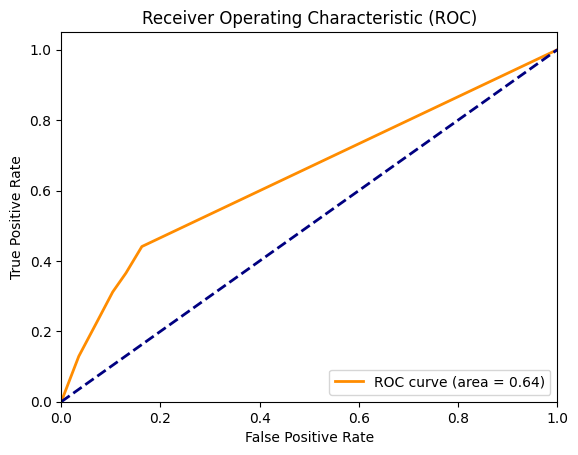

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_scores = knn_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Confusion matrix

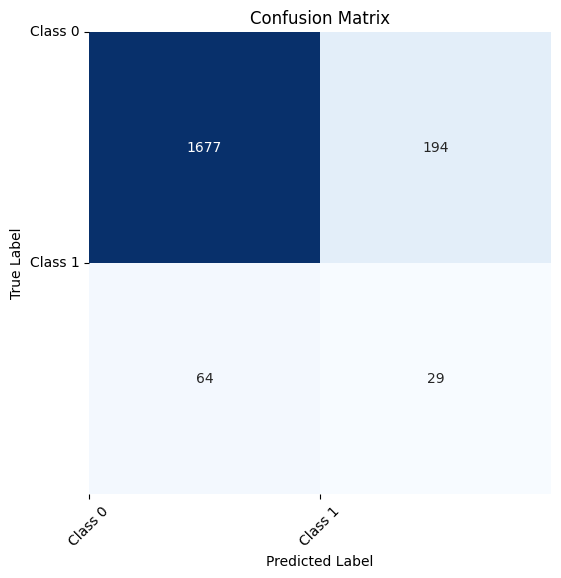

In [16]:

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
y_preds = knn_clf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)

# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(cm.shape[1]), labels=['Class 0', 'Class 1'], rotation=45)
plt.yticks(np.arange(cm.shape[0]), labels=['Class 0', 'Class 1'], rotation=0)
plt.show()


In [17]:


#bagging using decision tree as base estimator

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train_resampled, y_train_resampled)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred,zero_division=0), "\n")
print(f"Mean accuracy score: {bag_clf.score(X_test, y_test):.3f}")

#apply random forest

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train_resampled, y_train_resampled)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred,zero_division=0), "\n")

print(f"Mean accuracy score: {forest_clf.score(X_test, y_test):.3f}")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.99      0.66      0.79      1871
           1       0.11      0.85      0.20        93

    accuracy                           0.67      1964
   macro avg       0.55      0.76      0.49      1964
weighted avg       0.95      0.67      0.76      1964
 

Mean accuracy score: 0.671
Forest Classification Report
              precision    recall  f1-score   support

           0       0.98      0.68      0.81      1871
           1       0.11      0.75      0.18        93

    accuracy                           0.69      1964
   macro avg       0.54      0.72      0.49      1964
weighted avg       0.94      0.69      0.78      1964
 

Mean accuracy score: 0.685


### Confusion Matrix

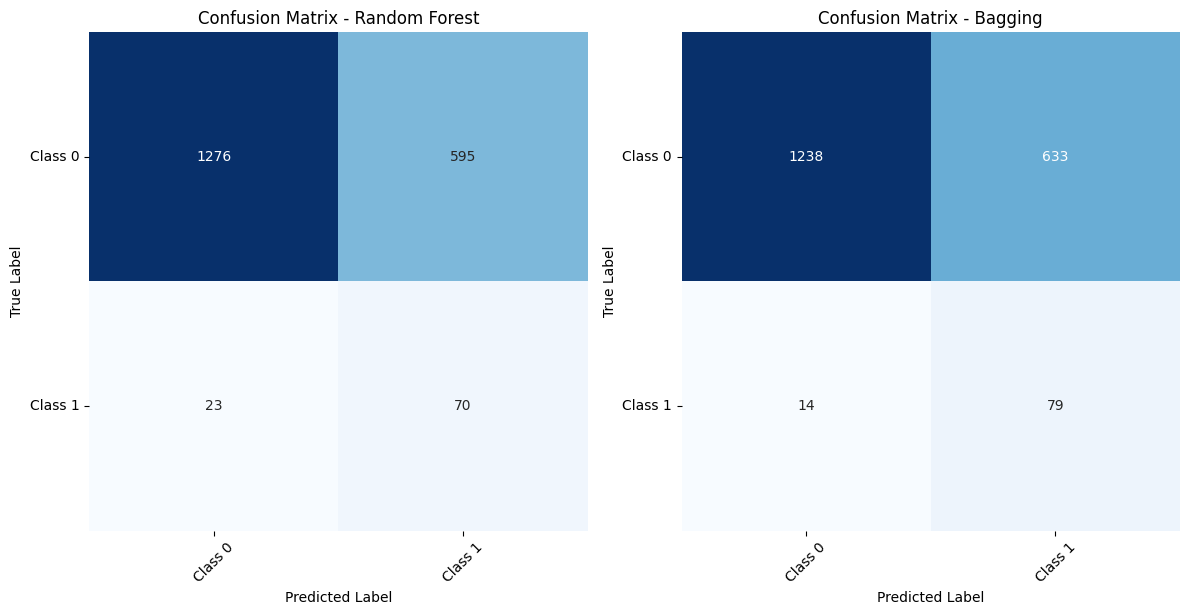

In [18]:


# Calculate the confusion matrix and plot for Random Forest
y_preds = forest_clf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, ax=axs[0])
axs[0].set_title('Confusion Matrix - Random Forest')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_xticks(np.arange(cm.shape[1])+0.5)
axs[0].set_xticklabels(['Class 0', 'Class 1'], rotation=45)
axs[0].set_yticks(np.arange(cm.shape[0])+0.5)
axs[0].set_yticklabels(['Class 0', 'Class 1'], rotation=0)

# Calculate the confusion matrix and plot for Bagging
y_preds = bag_clf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, ax=axs[1])
axs[1].set_title('Confusion Matrix - Bagging')
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_xticks(np.arange(cm.shape[1])+0.5)
axs[1].set_xticklabels(['Class 0', 'Class 1'], rotation=45)
axs[1].set_yticks(np.arange(cm.shape[0])+0.5)
axs[1].set_yticklabels(['Class 0', 'Class 1'], rotation=0)

plt.tight_layout()
plt.show()



### ROC Curve and AUC Scores

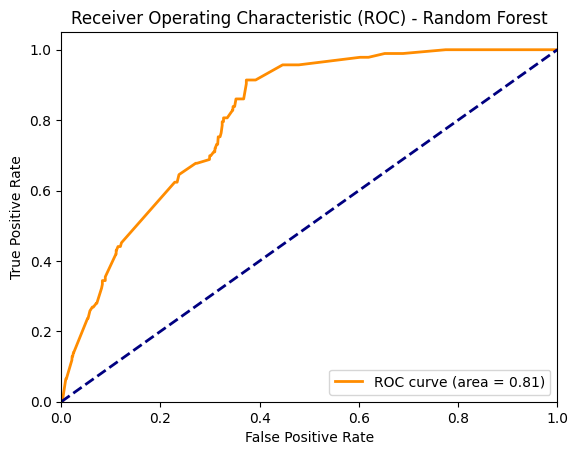

In [19]:
# Get the predicted probabilities for the positive class
y_scores = forest_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

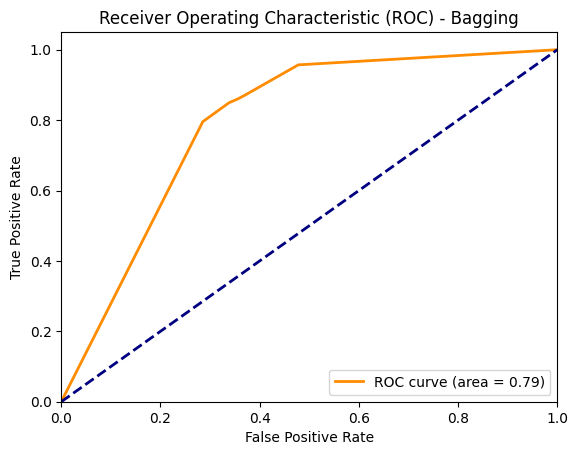

In [20]:
# Get the predicted probabilities for the positive class
y_scores = bag_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Bagging')
plt.legend(loc="lower right")
plt.show()

In [21]:
#apply neural network

from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(300, 300, 300), max_iter=100000)
mlp_clf.fit(X_train_resampled, y_train_resampled)
mlp_y_pred = mlp_clf.predict(X_test)
print(f"MLP Classification Report")
print(classification_report(y_test, mlp_y_pred,zero_division=0), "\n")
print(mlp_clf.score(X_test, y_test))
print(f"Mean accuracy score: {mlp_clf.score(X_test, y_test):.3f}")

MLP Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1871
           1       0.18      0.26      0.21        93

    accuracy                           0.91      1964
   macro avg       0.57      0.60      0.58      1964
weighted avg       0.93      0.91      0.92      1964
 

0.909877800407332
Mean accuracy score: 0.910


### Confusion Matrix

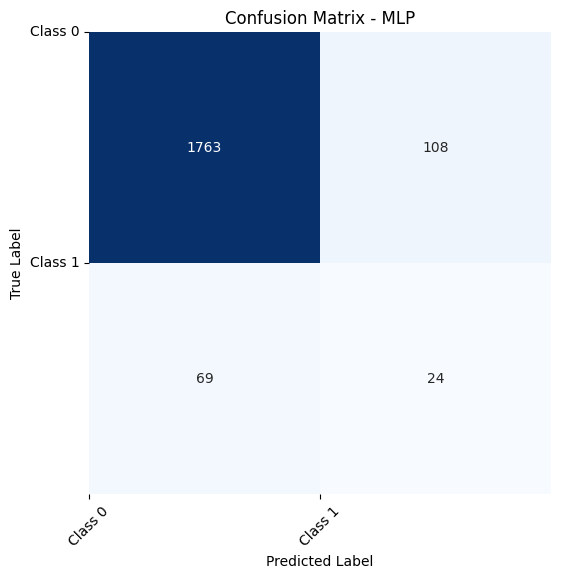

In [22]:

# Calculate the confusion matrix
y_preds = mlp_clf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)

# Customize the plot
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(cm.shape[1]), labels=['Class 0', 'Class 1'], rotation=45)
plt.yticks(np.arange(cm.shape[0]), labels=['Class 0', 'Class 1'], rotation=0)
plt.show()

### ROC Curve and AUC Scores

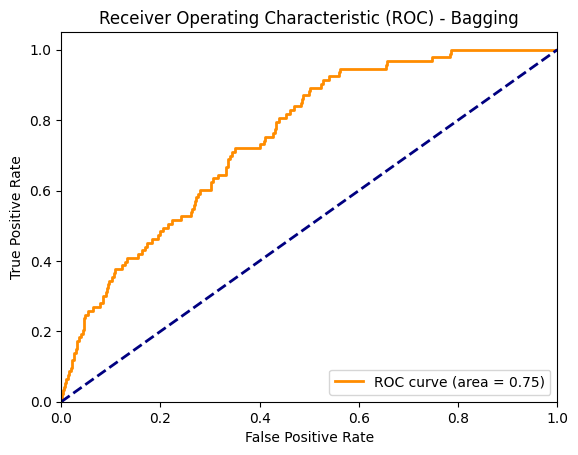

In [23]:
# Get the predicted probabilities for the positive class
y_scores = mlp_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Bagging')
plt.legend(loc="lower right")
plt.show()

In [24]:
#apply LogisticRegression

from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(max_iter=1000)
lg_clf.fit(X_train_resampled, y_train_resampled)
lg_y_pred = lg_clf.predict(X_test)
print(f"LogisticRegression Classification Report")
print(classification_report(y_test, lg_y_pred,zero_division=0), "\n")
print(f"Mean accuracy score: {lg_clf.score(X_test, y_test):.3f}")

LogisticRegression Classification Report
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1871
           1       0.13      0.81      0.22        93

    accuracy                           0.73      1964
   macro avg       0.56      0.77      0.53      1964
weighted avg       0.95      0.73      0.81      1964
 

Mean accuracy score: 0.733


### Confusion Matrix

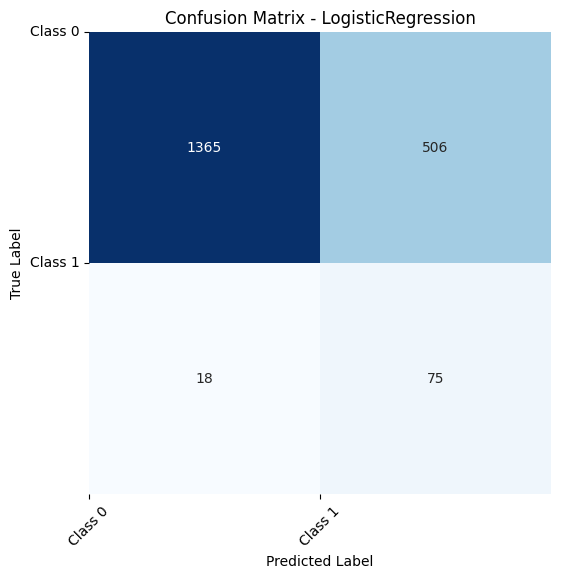

In [25]:

# Calculate the confusion matrix
y_preds = lg_clf.predict(X_test)
cm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)

# Customize the plot
plt.title('Confusion Matrix - LogisticRegression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(cm.shape[1]), labels=['Class 0', 'Class 1'], rotation=45)
plt.yticks(np.arange(cm.shape[0]), labels=['Class 0', 'Class 1'], rotation=0)
plt.show()

### ROC Curve and AUC Scores

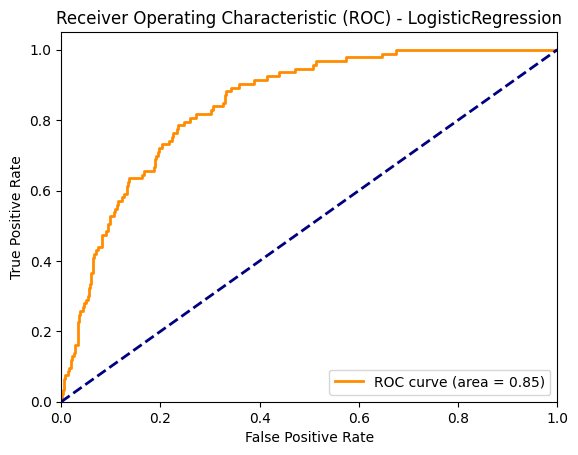

In [26]:
# Get the predicted probabilities for the positive class
y_scores = lg_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - LogisticRegression')
plt.legend(loc="lower right")
plt.show()

After running all five models, we all have a good result to imterpret the risk of stroke. 
To compare the models furture we did below:

## Model Comparision

In [27]:
model_scores = {}

model_scores['KNN']=knn_clf.score(X_test, y_test)
model_scores['Random_Forest']=forest_clf.score(X_test, y_test)
model_scores['BAG']=bag_clf.score(X_test, y_test)
model_scores['MLP']=mlp_clf.score(X_test, y_test)
model_scores['LG']=lg_clf.score(X_test, y_test)



model_scores

{'KNN': 0.8686354378818737,
 'Random_Forest': 0.685336048879837,
 'BAG': 0.6705702647657841,
 'MLP': 0.909877800407332,
 'LG': 0.7331975560081466}

<Axes: >

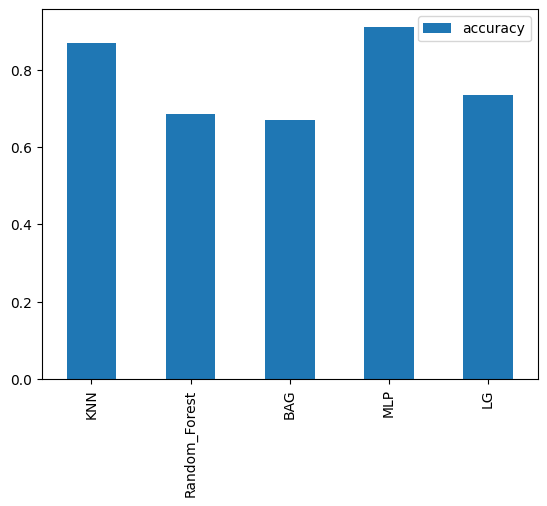

In [28]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])

model_compare.T.plot.bar()

We can see it from the graph that the MLP( ) model and KNN( ) model performs better than the other two. 

## Feature Importance Of LogisticRegression

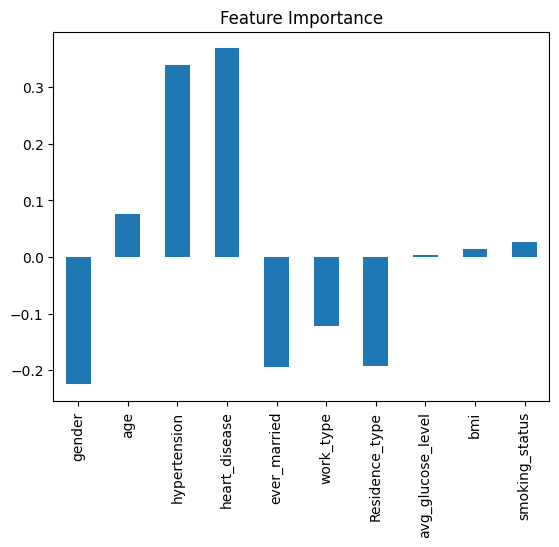

In [29]:
# Match features to columns
features_dict = dict(zip(df.columns, list(lg_clf.coef_[0])))

# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.
If the value is negative, it means there's a negative correlation. And vice versa for positive values.
So whether to have heart disease is the most important feature that influences the stroke probability.